In [6]:
import anndata
import scanpy as sc

In [2]:
split = 1

In [3]:
adata_train_path = f"/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/adata_train_{split}.h5ad"
adata_test_path = f"/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/adata_test_{split}.h5ad"
adata_ood_path = f"/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/adata_ood_{split}.h5ad"

In [4]:
adata_train = sc.read(adata_train_path)
adata_test = sc.read(adata_test_path)
adata_ood = sc.read(adata_ood_path)

In [7]:
adata = anndata.concat((adata_train, adata_test, adata_ood))

/home/icb/dominik.klein/mambaforge/envs/cfp/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [8]:
adata

AnnData object with n_obs × n_vars = 63878 × 2000
    obs: 'sample', 'Size_Factor', 'n.umi', 'RT_well', 'Drug1', 'Drug2', 'Well', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'condition', 'pathway1', 'pathway2', 'split', 'control', 'cell_type', 'cell_line', 'smiles_drug_1', 'smiles_drug_2', 'ood_1', 'ood_2', 'ood_3', 'ood_4'
    obsm: 'X_pca', 'X_umap', 'ecfp_drug_1', 'ecfp_drug_2'
    layers: 'counts'

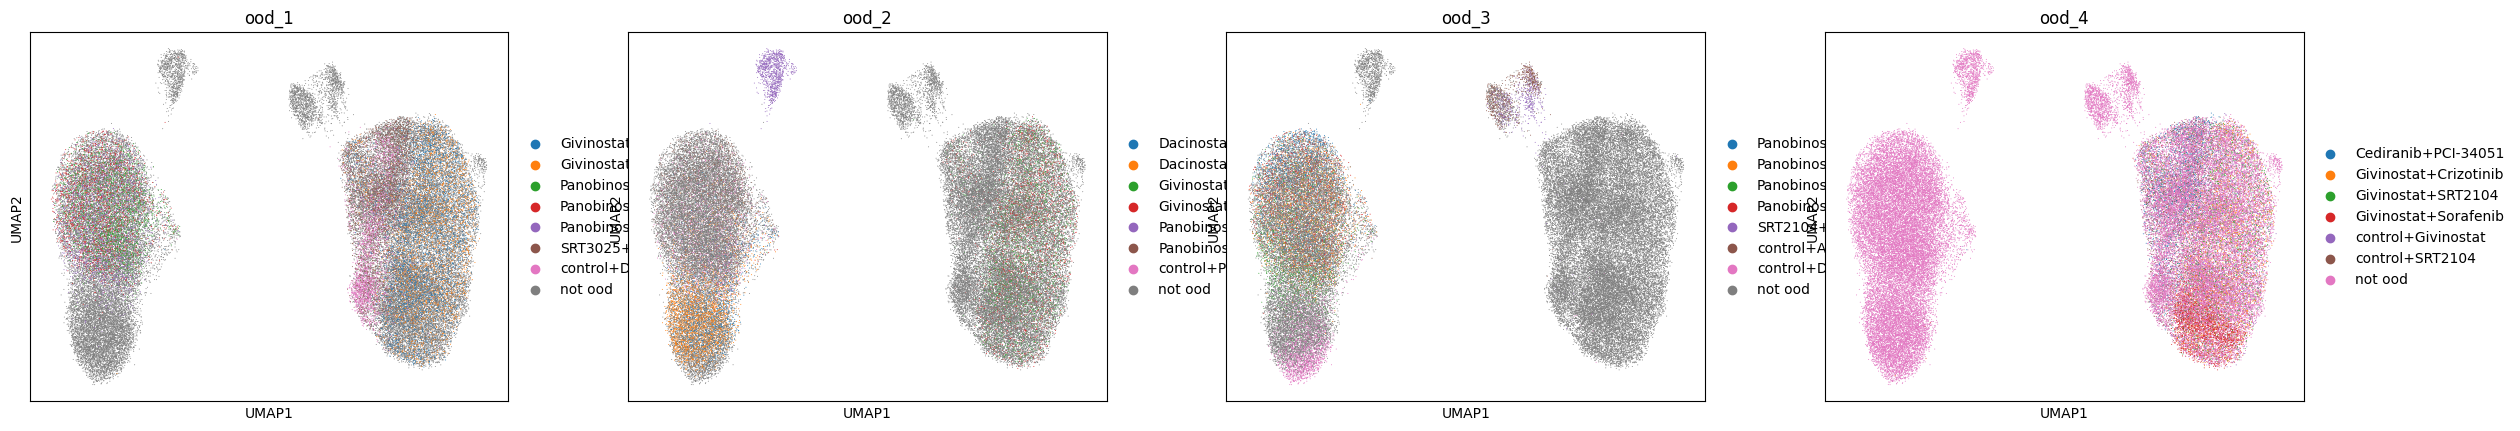

In [9]:
sc.pl.umap(adata, color=['ood_1', 'ood_2', 'ood_3', 'ood_4'])

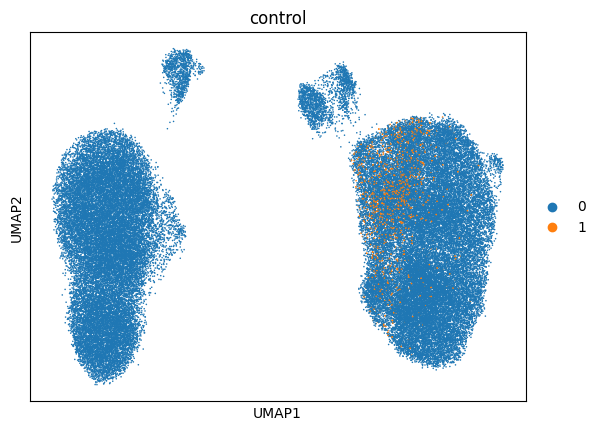

In [64]:
sc.pl.umap(adata, color="control", size=5)

In [29]:
cmap = plt.cm.get_cmap('nipy_spectral',32)

/tmp/ipykernel_2927495/1226621888.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral',32)


In [25]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

categories = adata.obs['condition'].unique()

random_colors = np.random.choice(np.asarray(list(plt.cm.tab20.colors)), len(categories), replace=False)

ValueError: a must be 1-dimensional

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Number of categories
n_categories = 32

# Generate n random colors
random_colors = np.random.rand(n_categories, 3)

# Create a colormap from the random colors
random_cmap = ListedColormap(random_colors)

In [57]:
color_map = dict(zip(categories, random_colors))
color_map[""] = np.array([0.8, 0.8, 0.8])

In [58]:
color_map['control+Panobinostat']

array([0.7529143 , 0.9235451 , 0.79901613])

In [59]:
palette = [color_map[cat] for cat in adata.obs['condition'].cat.categories]

In [62]:
palette

[array([0.94045744, 0.44606125, 0.08440793]),
 array([0.48718631, 0.11500818, 0.04405439]),
 array([0.94555341, 0.47375461, 0.28410987]),
 array([0.34791971, 0.52217081, 0.92575276]),
 array([0.52871453, 0.71333884, 0.36774561]),
 array([0.39924252, 0.59335853, 0.57169465]),
 array([0.6088117 , 0.22044152, 0.97914329]),
 array([0.10324576, 0.12686874, 0.94625884]),
 array([0.80721462, 0.77111412, 0.87540046]),
 array([0.32126015, 0.8019921 , 0.25481209]),
 array([0.86162322, 0.88717556, 0.00680495]),
 array([0.44258339, 0.90740365, 0.75353603]),
 array([0.05835243, 0.58718482, 0.17039038]),
 array([0.01836337, 0.49523968, 0.28254188]),
 array([0.58246923, 0.92625529, 0.5910892 ]),
 array([0.27891072, 0.33502536, 0.25622159]),
 array([0.28723812, 0.43373501, 0.4903297 ]),
 array([0.25105356, 0.26032704, 0.66966551]),
 array([0.86500652, 0.99226871, 0.93545761]),
 array([0.25847693, 0.97899637, 0.94932733]),
 array([0.35951463, 0.67611115, 0.39376364]),
 array([0.87209017, 0.30891012, 0.

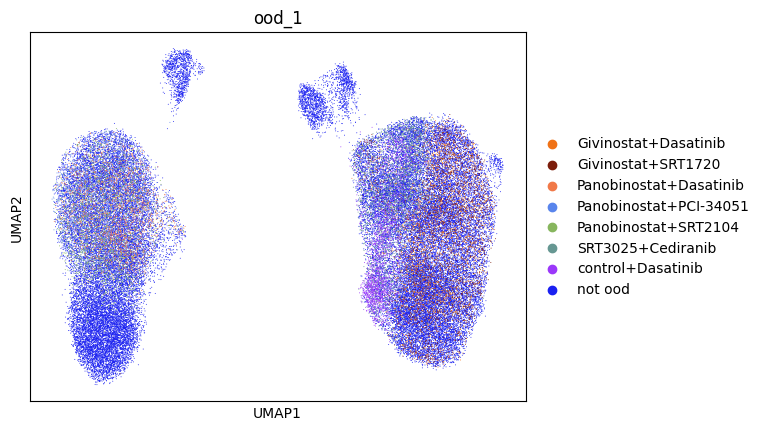

In [61]:
sc.pl.umap(adata, color="ood_1", palette=palette)

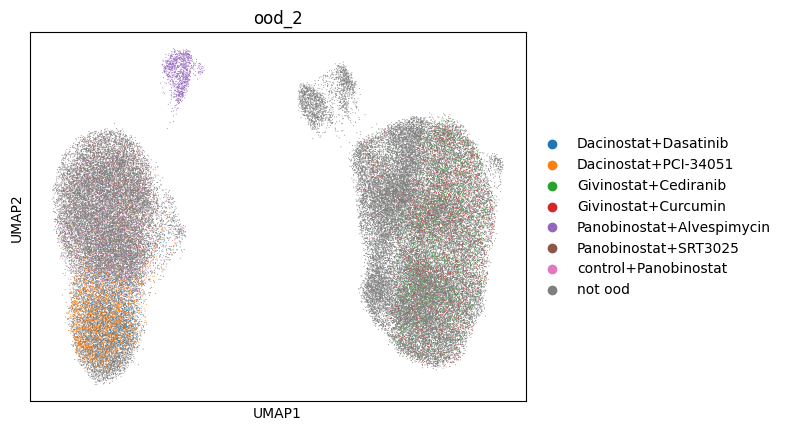

In [11]:
sc.pl.umap(adata, color="ood_2")

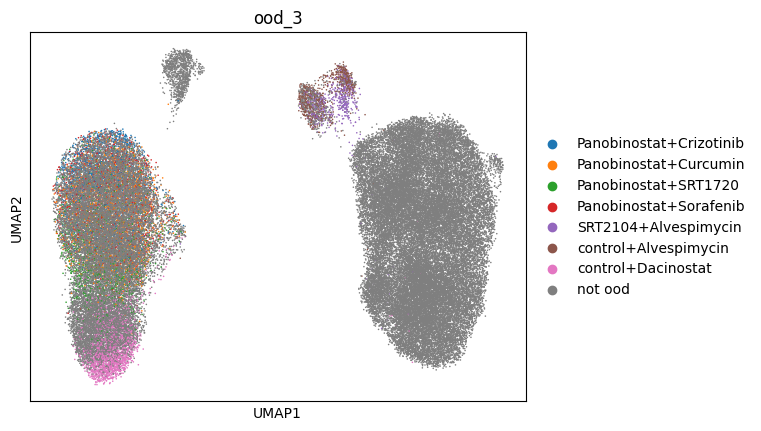

In [16]:
sc.pl.umap(adata, color="ood_3")

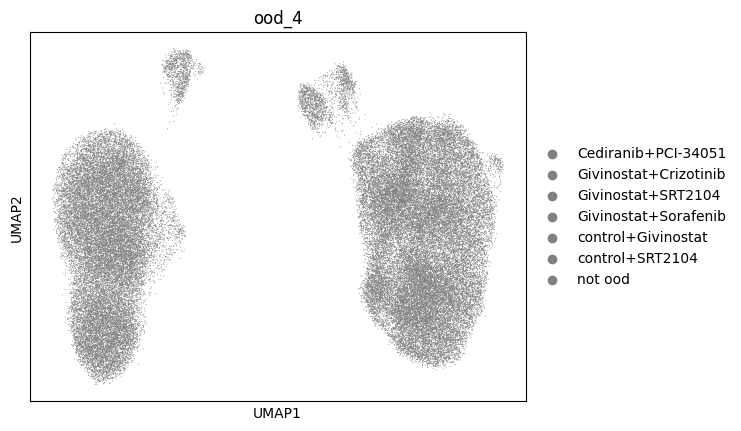

In [65]:
sc.pl.umap(adata, color="ood_4")